In [8]:
import numpy as np
import scipy.ndimage as sciim

from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

import matplotlib.pyplot as plt
%matplotlib inline

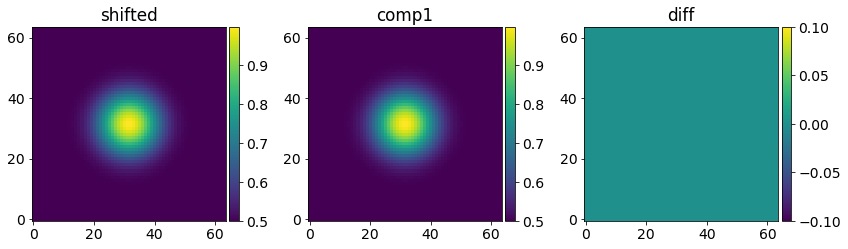

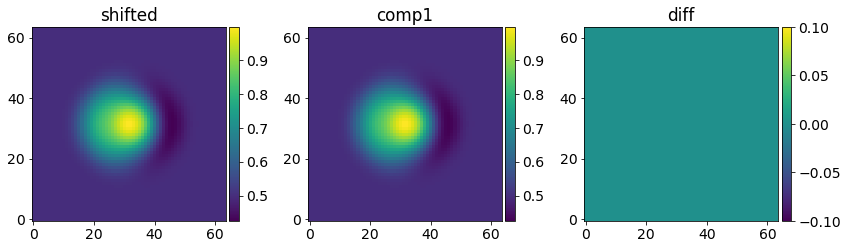

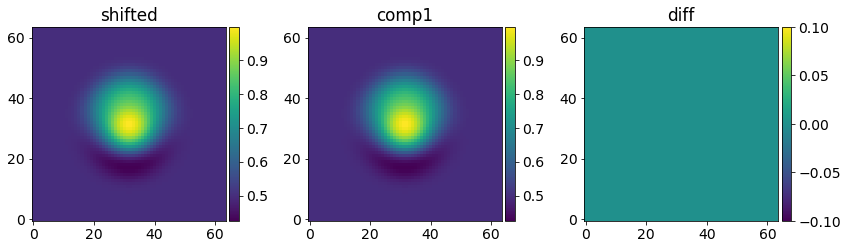

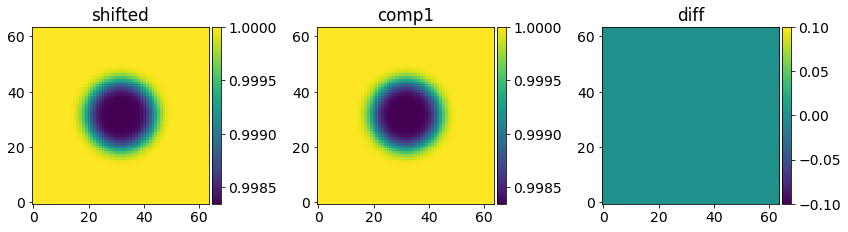

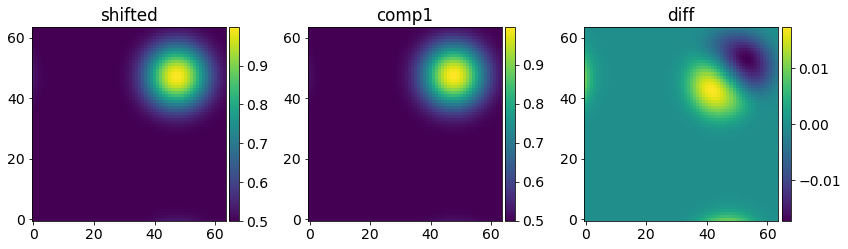

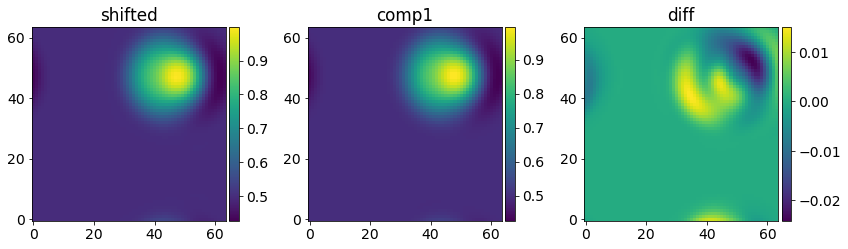

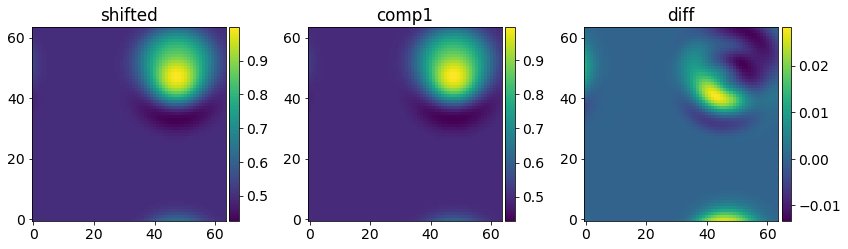

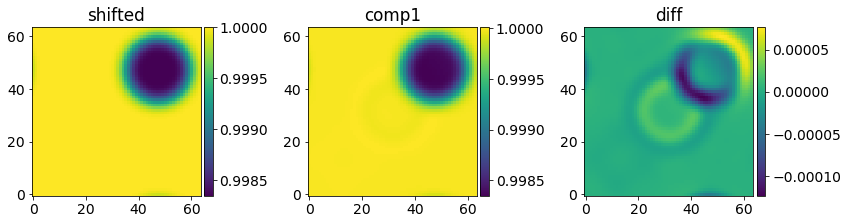

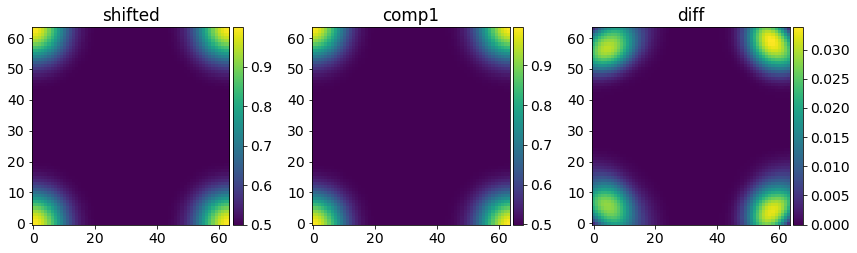

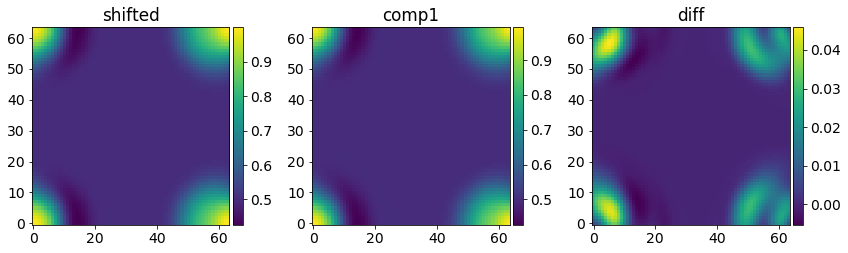

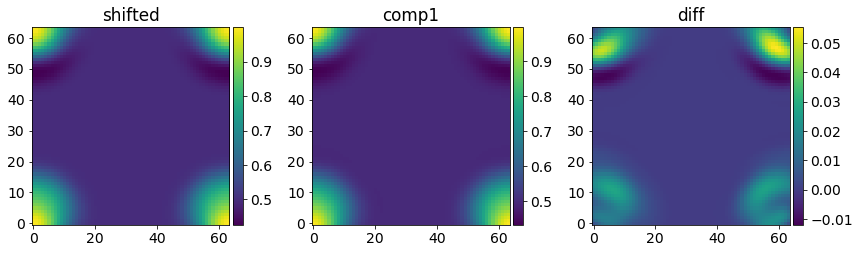

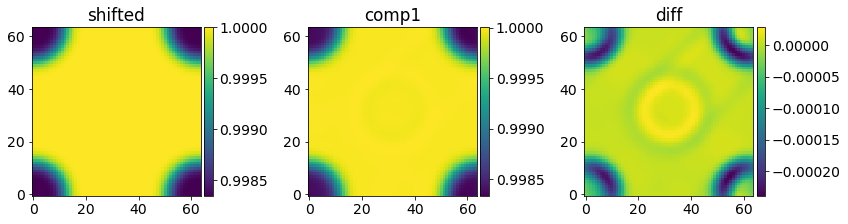

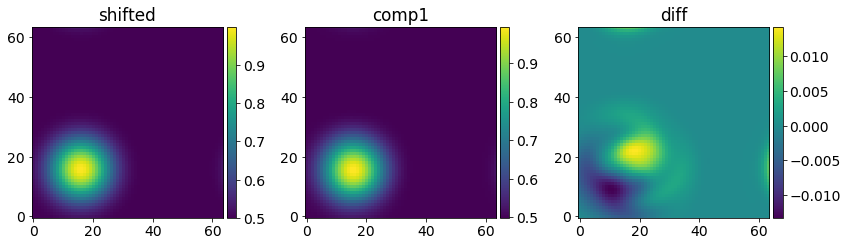

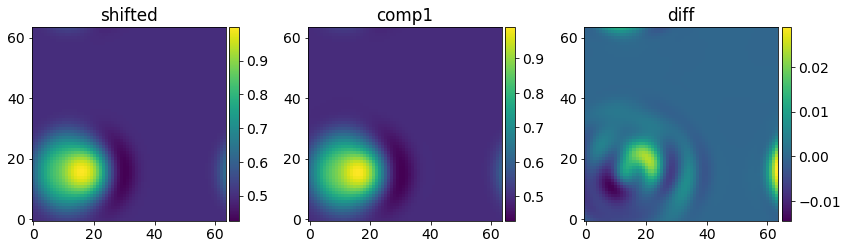

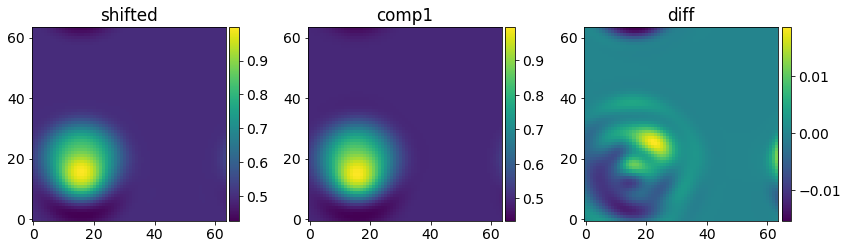

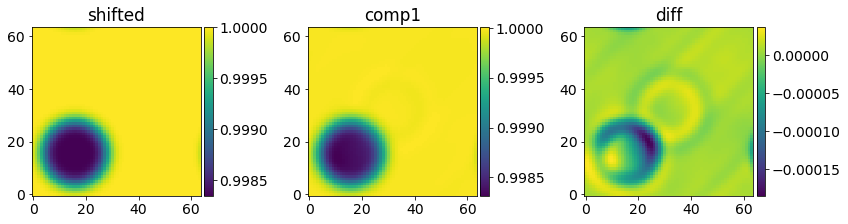

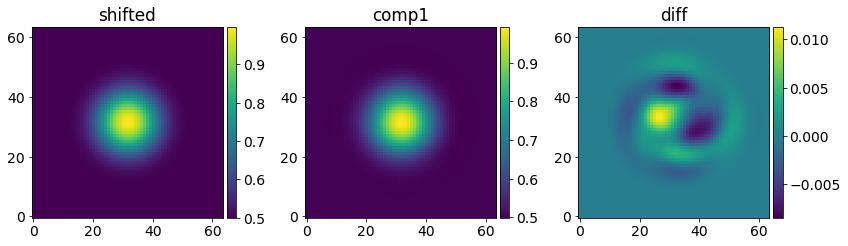

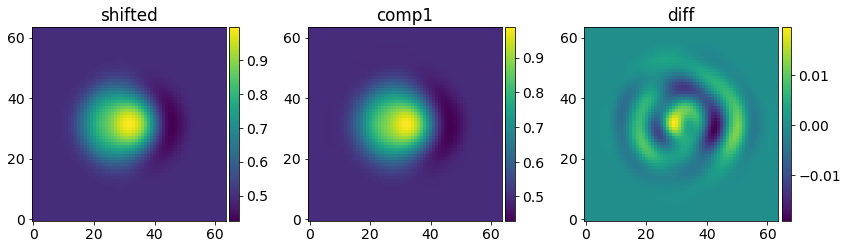

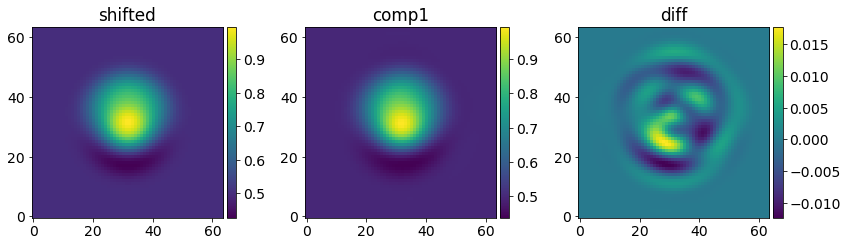

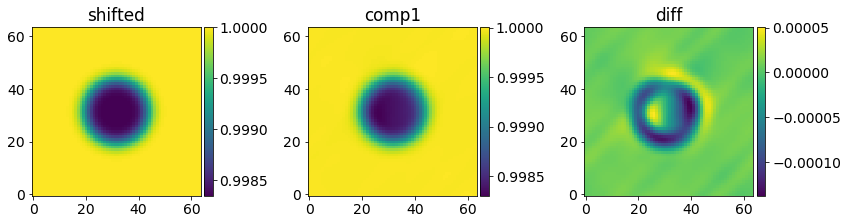

In [113]:
base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
N = 1

time = 0.0
time1 = [0.0,0.25,0.50,0.75,1.0]
# time1 = [0.0,0.0]
# attributes = ['rho','rhou','rhov','buoy','rhoY','p2_nodes']
attributes = ['rho','rhou','rhov','rhoY']

# steps_c = np.arange(0.0,68.1,68.0/4)
steps_c = np.arange(0.0,64.1,63.0/4)

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
fn = tc.get_filename(N,'comp_bal')
path = tc.get_path(fn)

for nn, stp in enumerate(steps_c):
    for attribute in attributes:
            comp0 = tc.get_arr(path, time, N, attribute, label_type='TIME', tag='after_full_step', inner=True, avg=False)
            comp0 = comp0[0]
            
            comp1 = tc.get_arr(path, time1[nn], N, attribute, label_type='TIME', tag='after_full_step', inner=False, avg=False)
            comp1 = comp1[0]

            shifted = sciim.shift(comp0, stp, mode='wrap')
#             shifted = shifted[tc.i2]
            shifted = np.pad(shifted,2,mode='wrap')
            
            diff = [shifted-comp1,"diff"]
            shifted = [shifted,"shifted"]
            comp1 = [comp1,"comp1"]
            

            pl = pt.plotter([shifted,comp1,diff],ncols=3)
            pl.plot(inner=True)